## 第 2 次作业：最小二乘法拟合 $\alpha$ 衰变半衰期

$\alpha$ 衰变指原子核自发放出 $\alpha$ 粒子的过程，$\alpha$ 粒子由两个质子、两个中子构成，它是氦原子的原子核 $^4{\rm He}$。

$\alpha$ 衰变一般可表示为 $_Z^A X \rightarrow _{Z-2}^{A-4}Y + _2^4{\rm He}$，其中 X 表示 Z 个质子，A（=Z+N）个核子的母核(Parent Nucleus),
Y 表示 $\alpha$ 衰变后的子核(Daughter Nucleus)。

原子核的 $\alpha$ 衰变半衰期可以通过量子力学的隧穿机制计算。计算结果与人们从经验上总结的盖革-努塔尔（Geiger-Nuttall)公式定性符合，

\begin{align}
\log_{10} W &= C - D / \sqrt{E_{\alpha}}
\end{align}

其中 $W$ 为单位时间跃迁概率，理论上可通过费米黄金规则得到，$W = {2\pi \over \hbar} |\langle f | V | i \rangle |^2 \rho(E)$，此处 $W$ 作为最小二乘法拟合半衰期的辅助变量，

\begin{align}
\tau_{1/2} = {\ln 2 \over W} 
\end{align}

从某些重原子核的 $\alpha$ 衰变半衰期 $\tau_{1/2}$ 与发射 $\alpha$ 粒子的能量 $E_{\alpha}$ 的实验数据文件 alpha_decay.csv 中读取 tau_half 与 Ealpha，将半衰期单位(units)统一为秒(second), 然后使用最小二乘拟合，
将其中的 19 个数据点，拟合出 C 和 D 的值，并预测第20个数据点 Cm246 的半衰期。

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建文件夹 data, 将 alpha_decay.csv 文件放在 data/ 文件夹下
df = pd.read_csv("data/alpha_decay.csv")

In [10]:
df.head()

,nucleus,Ealpha,tau_half,tau_units
0,Po206,5.22,8.8,day
1,Po208,5.11,2.9,year
2,Po210,5.31,138.0,day
3,Po212,8.78,0.3,microsecond
4,Po214,7.68,164.0,microsecond


In [11]:
# 这段代码用于单位转换
units = df['tau_units']

def cond(unit):
    '''将所有单位统一为秒'''
    if unit=='day': return 24*3600
    if unit=='year': return 365*24*3600
    if unit=='month': return 30*24*3600
    if unit=='microsecond': return 1.0E-6
    if unit=='second': return 1

# unit_trans 保存了所有半衰期单位到秒的转化
unit_trans = [cond(u) for u in units]

In [13]:
# tau 转换为 second （秒）的单位
tau_insecond = df['tau_half'] * np.array(unit_trans)

# 在 DataFrame 中新开辟一列数据
df['tau_insecond'] = tau_insecond

df.head()

,nucleus,Ealpha,tau_half,tau_units,tau_insecond
0,Po206,5.22,8.8,day,7.603200e+05
1,Po208,5.11,2.9,year,9.145440e+07
2,Po210,5.31,138.0,day,1.192320e+07
3,Po212,8.78,0.3,microsecond,3.000000e-07
4,Po214,7.68,164.0,microsecond,1.640000e-04


In [14]:
# 对 DataFrame 按找 Ealpha 的值排序，否则画图很奇怪
df = df.sort_values('Ealpha')

Text(0, 0.5, '$\\log_{10} W$')

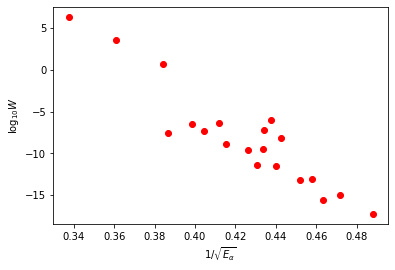

In [23]:
W = np.log(2) / df['tau_insecond']
Ealpha = df['Ealpha']
plt.figure(figsize=(6, 4))
plt.plot(1/np.sqrt(Ealpha), np.log10(W), 'ro')
plt.xlabel(r'$1/\sqrt{E_{\alpha}}$')
plt.ylabel(r'$\log_{10} W$')

作业任务：将拟合公式定义为 $y=a x + b$, 其中 $y = \log_{10} W$, 变量 $x=1/\sqrt{E_{\alpha}}$,
1. 写出损失函数
2. 推导最小二乘法拟合公式（使用 Markdown cell 的 Latex 公式编写）
3. 写代码提取 a 和 b 的值。

## 备注：

数据从 宁平治老师的《原子核物理学简明教程》中获取，保存为 csv 格式的代码如下，

```python
import pandas as pd

# 母原子核，
Nucleus = ['Po206', 'Po208', 'Po210', 'Po212', 'Po214', 'Po216', 
           'U228', 'U230', 'U232', 'U234', 'U236', 'U238',
           'Pu238', 'Pu240', 'Pu242', 'Pu244', 
           'Cm240', 'Cm242', 'Cm244', 'Cm246']

# the energy of alpha particle
Ealpha = [5.22, 5.11, 5.31, 8.78, 7.68, 6.78,
          6.69, 5.89, 5.32, 4.77, 4.49, 4.20,
          5.50, 5.17, 4.90, 4.66,
          6.29, 6.12, 5.80, 5.39]

# halflife
tau_half = [8.8, 2.9, 138, 0.3, 164, 0.15,
            9.1, 20.8, 72, 2.47E5, 2.39E7, 4.51E9,
            86, 6.58E3, 3.79E5, 8.0E7, 26.8, 163, 17.6, 5.5E3]

# units of halflife
tau_units = ['day', 'year', 'day', 'microsecond', 'microsecond', 'second',
            'month', 'day', 'year', 'year', 'year', 'year',
            'year', 'year', 'year', 'year', 
            'day', 'day', 'year', 'year']


df1 = pd.DataFrame({"nucleus":Nucleus,
                    "Ealpha":Ealpha,
                    "tau_half":tau_half,
                    "tau_units":tau_units})

df1.to_csv("alpha_decay.csv", index=False)
```